In [11]:
from shapely import from_wkt
import polars as pl
from polars import col as c
from shapely.geometry import Point, Polygon, MultiPolygon
from shapely import set_precision


In [2]:
polygon = Polygon([(0, 0), (1, 0), (1, 1), (0, 1), (0, 0), (0.5, 0.5)]).wkt

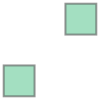

In [3]:
MultiPolygon([Polygon([(0, 0), (1, 0), (1, 1), (0, 1), (0, 0)]), Polygon([(2, 2), (3, 2), (3, 3), (2, 3), (2, 2)])])

In [4]:
invalid_multipolygon_str = "MULTIPOLYGON (((0 0, 1 0, 1 1, 0 1, 0 0, 0.5 0.5, 0 0)), ((2 2, 3 2, 3 3, 2 3, 2 2)))"

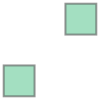

In [5]:
from shapely_function import  generate_valid_polygon
from polars_shapely_function import  shape_coordinate_transformer_col
generate_valid_polygon(invalid_multipolygon_str)

In [6]:
print(MultiPolygon(list(map(lambda s: s if s.is_valid else s.convex_hull, from_wkt(invalid_multipolygon_str).geoms))))

MULTIPOLYGON (((0 0, 0 1, 1 1, 1 0, 0 0)), ((2 2, 3 2, 3 3, 2 3, 2 2)))


In [7]:
df: pl.DataFrame = pl.DataFrame({"geometry": [Point((1, 1))]})
df.with_columns(shape_coordinate_transformer_col(pl.col("geometry"), 4326, 2056).alias("transformed"))


geometry,transformed
object,object
POINT (1 1),POINT (1576838.9474580784 -4479628.949809804)


POINT (-20 32)


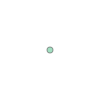

In [20]:

# Generate a list of lists of points
points = pl.DataFrame({"geo": [[(Point(x, y)).wkt for x in range(3)] for y in range(3)]})

points.select(
    c("geo").list.eval(pl.element().map_elements(from_wkt, return_dtype=pl.Object))
)

thread '<unnamed>' panicked at crates/polars-core/src/series/iterator.rs:84:9:
object dtype not supported in Series.iter


PanicException: object dtype not supported in Series.iter